In [2]:
import pandas as pd
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('./bank.csv')
# exitedList = data['Exited']
# data['Stayed'] = [1 if exited == 0 else 0 for exited in exitedList]
data['Stayed'] = (data['Exited'] == 0).astype(int) # Vectorized implementation

In [28]:
print(data.head())

   CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   NaN       2       0.00              1   
1          608     Spain  Female  41.0       1   83807.86              1   
2          502    France  Female  42.0       8  159660.80              3   
3          699    France  Female  39.0       1       0.00              2   
4          850     Spain  Female  43.0       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Satisfaction.Score  \
0          1               1        101348.88       1                   2   
1          0               1        112542.58       0                   3   
2          1               0        113931.57       1                   3   
3          0               0         93826.63       0                   5   
4          1               1         79084.10       0                   5   

  Card.Type  Point.Earned  Stayed  
0   DIAMOND           464       0  
1   DIAM

In [4]:
data = data.drop(labels=['Surname'], axis=1)

In [5]:
geography_dummies = pd.get_dummies(data['Geography'], prefix='Geography').astype(int)
gender_dummies = pd.get_dummies(data['Gender'], prefix='Gender').astype(int)
cardtype_dummies = pd.get_dummies(data['Card.Type'], prefix='CardType').astype(int)

data = data.drop(['Geography', 'Gender', 'Card.Type'], axis=1)

data = pd.concat([data, geography_dummies, gender_dummies, cardtype_dummies], axis=1)

In [7]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

_, p = shapiro(data['Age'])
if p < 0.05:
    print("age is normally distributed") 
else: 
    print("age is not normally distributed")

data.fillna({'Age': data['Age'].median()}, inplace=True)

age is not normally distributed


In [ ]:
data.corr()

In [9]:
print(data.isna().sum())

CreditScore           0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Satisfaction.Score    0
Point.Earned          0
Stayed                0
Geography_-           0
Geography_France      0
Geography_Germany     0
Geography_Spain       0
Gender_Female         0
Gender_Male           0
CardType_DIAMOND      0
CardType_GOLD         0
CardType_PLATINUM     0
CardType_SILVER       0
dtype: int64


In [10]:
print(data.dtypes)

CreditScore             int64
Age                   float64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Satisfaction.Score      int64
Point.Earned            int64
Stayed                  int32
Geography_-             int32
Geography_France        int32
Geography_Germany       int32
Geography_Spain         int32
Gender_Female           int32
Gender_Male             int32
CardType_DIAMOND        int32
CardType_GOLD           int32
CardType_PLATINUM       int32
CardType_SILVER         int32
dtype: object


In [11]:
data_subset = data[data['Age'] <= 87]
print(data_subset.dtypes)

CreditScore             int64
Age                   float64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Satisfaction.Score      int64
Point.Earned            int64
Stayed                  int32
Geography_-             int32
Geography_France        int32
Geography_Germany       int32
Geography_Spain         int32
Gender_Female           int32
Gender_Male             int32
CardType_DIAMOND        int32
CardType_GOLD           int32
CardType_PLATINUM       int32
CardType_SILVER         int32
dtype: object


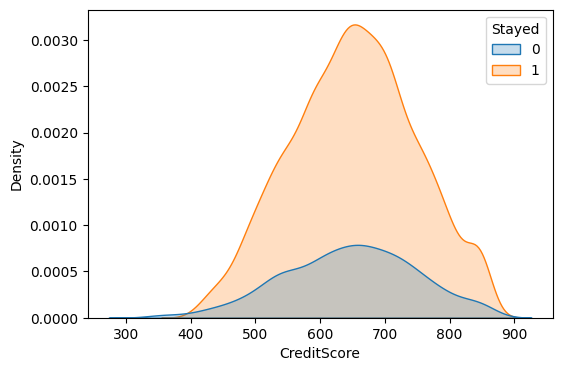

In [12]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=data_subset, x='CreditScore', hue='Stayed', fill=True)
plt.show()

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np

x = data_subset.drop(['Stayed'], axis=1)
y = data_subset['Stayed']
x_train, y_train, x_test, y_text = train_test_split(x, y, test_size=0.2, random_state=123)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
param_grid = {'ccp_alpha': np.arange(0.0, 0.05, 0.0025)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=cv, scoring='accuracy')
grid.fit(x_train, y_train)

best_ccp_alpha = grid.best_params_['ccp_alpha']

ValueError: Found input variables with inconsistent numbers of samples: [3917, 980]